idefics2 model

In [5]:
! pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
  Using cached scipy-1.13.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 170.8 MB/s eta 0:00:0000:010:01
Using cached scipy-1.13.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [1]:
import utils, sivqa_utils
import os 
import json
from sklearn.metrics import accuracy_score
import re
import random
import glob

In [10]:
# result_dir = "/scratch3/wenyan/data/foodie/results"  # saltholm
# result_dir = "/scratch/project/dd-23-107/wenyan/data/foodie/results" # karolina


## sivqa Acc

In [187]:
# sivqa = sivqa_utils.read_sivqa("/scratch3/wenyan/data/foodie")
# sivqa = sivqa_utils.read_sivqa("/scratch/project/dd-23-107/wenyan/data/foodie/")

result_dir = "/Users/wli/projects/foodie-dataset/data/results/sivqa_res"
sivqa = sivqa_utils.read_sivqa("/Users/wli/projects/foodie-dataset/data/")

### eval mantis accuracy

In [181]:
sivqa[0]

{'question': '图片中的食物通常属于哪个菜系?',
 'choices': ['京菜', '徽菜', '新疆菜', '桂菜'],
 'answer': '2',
 'question_type': 'cuisine_type',
 'food_name': '烤羊肉串',
 'question_id': 'vqa-0',
 'food_meta': {'main_ingredient': ['肉', '羊'],
  'id': 217,
  'food_name': '烤羊肉串',
  'food_type': '新疆菜',
  'food_location': '餐馆',
  'food_file': '14456664_all_202404292352223293/217_IMG_3854.jpeg'}}

In [202]:

ans2idx = {
        "A":"0",
        "B":"1",
        "C":"2",
        "D":"3"
        }

def parse_res(res):
    ans_str = res["response"][0].split("\nAssistant:")[-1].strip()
    ans_letter = re.findall(r'[A-D]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]
        
def read_res_data(res_file):
    data = []
    # "sivqa_mantis_prompt3.jsonl"
    with open(os.path.join(result_dir, res_file), "r", encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data
        
def get_accuracy(sivqa, data, parse_fn=parse_res): 
    # get acc
    gts = [s["answer"] for s in sivqa]
    answers = [parse_fn(d) for d in data]
    accuracy = accuracy_score(gts, answers)
    print(accuracy)
    return accuracy

def get_res_and_acc(sivqa, res_file_prefix, parse_fn):
    res_files = glob.glob(os.path.join(result_dir, res_file_prefix))
    print(sorted(res_files))
    
    all_data = []
    all_acc = []
    for file in sorted(res_files):
        file_name = os.path.basename(file)
        print(file_name)
        # load data
        data = read_res_data(file_name)        
        # print(data[0])
        acc = get_accuracy(sivqa, data, parse_fn)
        
        all_data.append(data)
        all_acc.append(round(acc,4))
    return all_data, all_acc

In [203]:
mantis_data, mantis_acc = get_res_and_acc(sivqa, "sivqa_mantis_prompt*.jsonl", parse_res)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_mantis_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_mantis_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_mantis_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_mantis_prompt3.jsonl']
sivqa_mantis_prompt0.jsonl
0.40234375
sivqa_mantis_prompt1.jsonl
0.41796875
sivqa_mantis_prompt2.jsonl
0.41796875
sivqa_mantis_prompt3.jsonl
0.40234375


In [204]:
print(mantis_acc)

[0.4023, 0.418, 0.418, 0.4023]


In [205]:
d = read_res_data("/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Mantis-8B-Idefics2_en_prompt0.jsonl")

In [206]:
mantis_en_data, mantis_en_acc = get_res_and_acc(sivqa, "sivqa_Mantis-8B-Idefics2_en_prompt*.jsonl", parse_res)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Mantis-8B-Idefics2_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Mantis-8B-Idefics2_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Mantis-8B-Idefics2_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Mantis-8B-Idefics2_en_prompt3.jsonl']
sivqa_Mantis-8B-Idefics2_en_prompt0.jsonl
0.46875
sivqa_Mantis-8B-Idefics2_en_prompt1.jsonl
0.4765625
sivqa_Mantis-8B-Idefics2_en_prompt2.jsonl
0.46875
sivqa_Mantis-8B-Idefics2_en_prompt3.jsonl
0.46484375


In [207]:
print(mantis_en_acc)

[0.4688, 0.4766, 0.4688, 0.4648]


In [208]:
idefics2_en_data, idefics2_en_acc = get_res_and_acc(sivqa, "sivqa_idefics2-8b_en_prompt*.jsonl", parse_res)
print(idefics2_en_acc)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics2-8b_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics2-8b_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics2-8b_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics2-8b_en_prompt3.jsonl']
sivqa_idefics2-8b_en_prompt0.jsonl
0.50390625
sivqa_idefics2-8b_en_prompt1.jsonl
0.52734375
sivqa_idefics2-8b_en_prompt2.jsonl
can not parse ans for res:  {'response': ['User: The food in the picture is a specialty of which region? Here are the options: （A) Jiangsu\n（B) Hong Kong\n（C) Beijing and Tianjin\n（D) Guangxi\n \nAssistant: If had to select one of the options, my answer would be ( \nAssistant: Guangxi.'], 'qid': 'vqa-79'}
0.4765625
sivqa_idefics2-8b_en_prompt3.jsonl
can not parse ans for res:  {'response': ['User: The food in the picture is a specialty of which region? These are the options: （A) Zhej

In [213]:
def parse_res(res):
    ans_str = res["response"]
    ans_letter = re.findall(r'[A-D]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]
        
yi_en_data, yi_en_acc = get_res_and_acc(sivqa, "sivqa_Yi-VL-6B_en_prompt*.jsonl", parse_res)
print(yi_en_acc)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-6B_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-6B_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-6B_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-6B_en_prompt3.jsonl']
sivqa_Yi-VL-6B_en_prompt0.jsonl
0.4140625
sivqa_Yi-VL-6B_en_prompt1.jsonl
0.4140625
sivqa_Yi-VL-6B_en_prompt2.jsonl
0.4140625
sivqa_Yi-VL-6B_en_prompt3.jsonl
can not parse ans for res:  {'response': '(11,47),(999,987)', 'qid': 'vqa-23'}
can not parse ans for res:  {'response': '(14,304),(603,721)', 'qid': 'vqa-25'}
can not parse ans for res:  {'response': '(111,121),(841,907)', 'qid': 'vqa-36'}
can not parse ans for res:  {'response': '', 'qid': 'vqa-57'}
can not parse ans for res:  {'response': '(168,240),(709,868)', 'qid': 'vqa-79'}
can not parse ans for res:  {'response': '(176,145),(999,984)', 'qid': 'vqa-80'}
can n

In [214]:
def parse_res(res):
    ans_str = res["response"]
    ans_letter = re.findall(r'[A-D]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]
        
yi_en_data, yi_en_acc = get_res_and_acc(sivqa, "sivqa_Yi-VL-6B_en_prompt*.jsonl", parse_res)
print(yi_en_acc)
yi_34en_data, yi_34en_acc = get_res_and_acc(sivqa, "sivqa_Yi-VL-34B_en_prompt*.jsonl", parse_res)
print(yi_34en_acc)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-34B_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-34B_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-34B_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-34B_en_prompt3.jsonl']
sivqa_Yi-VL-34B_en_prompt0.jsonl
0.4765625
sivqa_Yi-VL-34B_en_prompt1.jsonl
0.453125
sivqa_Yi-VL-34B_en_prompt2.jsonl
0.48046875
sivqa_Yi-VL-34B_en_prompt3.jsonl
0.45703125
[0.4766, 0.4531, 0.4805, 0.457]


In [242]:
def parse_res(res, template=0):
    try:
        if template == 0 or template==2:
            ans_str = res["response"].split("my answer would be")[1].strip()
        elif template == 1:
            ans_str = res["response"].split("Please select one of the options as your answer")[1].strip()
        elif template == 3:
            ans_str = res["response"].split("Assistant: I would select")[1].strip()
    except:
        ans_str = res["response"].strip()
    ans_letter = re.findall(r'[A-D]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]
qwen_en_data, qwen_en_acc = get_res_and_acc(sivqa, "sivqa_Qwen-VL_en_prompt*.jsonl", parse_res)
print(qwen_en_acc)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Qwen-VL_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Qwen-VL_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Qwen-VL_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Qwen-VL_en_prompt3.jsonl']
sivqa_Qwen-VL_en_prompt0.jsonl
0.4296875
sivqa_Qwen-VL_en_prompt1.jsonl
0.24609375
sivqa_Qwen-VL_en_prompt2.jsonl
0.3984375
sivqa_Qwen-VL_en_prompt3.jsonl
0.24609375
[0.4297, 0.2461, 0.3984, 0.2461]


In [9]:
idefics_res_files = glob.glob(os.path.join(result_dir, "sivqa_idefics*.jsonl"))
print(idefics_res_files)

for file in sorted(idefics_res_files):
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    get_accuracy(sivqa, data)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics_prompt3.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_idefics_prompt4.jsonl']
sivqa_idefics_prompt0.jsonl
can not parse ans for res:  {'response': ['User: 去哪个地方游玩时应该品尝当地的特色美食图片中的食物? 选项有: （A) 川渝\n（B) 浙江\n（C) 贵州\n（D) 云南\n, 请根据上图从所提供的选项中选择一个正确答案，为（ \nAssistant: 川渝.'], 'qid': 'vqa-6'}
can not parse ans for res:  {'response': ['User: 图片中的食物烹饪时一般需要? 选项有: （A) 煮\n（B) 熏\n（C) 蒸\n（D) 晒\n, 请根据上图从所提供的选项中选择一个正确答案，为（ \nAssistant: 煮.'], 'qid': 'vqa-154'}
can not parse ans for res:  {'response': ['User: 图片中的食物做的时候一般需要? 选项有: （A) 煎\n（B) 晒\n（C) 蒸\n（D) 熏\n, 请根据上图从所提供的选项中选择一个正确答案，为（ \nAssistant: 煮.'], 'qid': 'vqa-223'}
0.44140625
sivqa_idefics_pr

### phi3

In [76]:
def parse_res(res):
    random.seed(42)
    ans_str = res["response"]
    ans_letter = re.findall(r'[A-Z]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]

In [24]:
phi3_res_files = glob.glob(os.path.join(result_dir, "sivqa_Phi-3*_en*.jsonl"))
print(phi3_res_files)

for file in sorted(phi3_res_files):
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    get_accuracy(sivqa, data, parse_fn=parse_res)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Phi-3-vision-128k-instruct_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Phi-3-vision-128k-instruct_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Phi-3-vision-128k-instruct_en_prompt3.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Phi-3-vision-128k-instruct_en_prompt1.jsonl']
sivqa_Phi-3-vision-128k-instruct_en_prompt0.jsonl
can not parse ans for res:  {'response': '\nThe image shows a dish that appears to be a type of braised meat, which is a specialty of the Xinjiang region. The dish is served with a side of soup and a spoon, and there are also some spices and a chopstick visible. The correct answer is (A) Xinjiang.', 'qid': 'vqa-161'}
0.44140625
sivqa_Phi-3-vision-128k-instruct_en_prompt1.jsonl
0.42578125
sivqa_Phi-3-vision-128k-instruct_en_prompt2.jsonl
0.4140625
sivqa_Phi-3-vision-128k-instruct_en_prompt3.jsonl
can 

In [87]:
data = read_res_data("sivqa_idefics_prompt0.jsonl")

In [90]:
data[0:30]

[{'response': ['User: 图片中的食物通常属于哪个菜系? 选项有: A. 京菜B. 徽菜C. 新疆菜D. 桂菜, 请根据上图从所提供的选项中选择一个正确答案，并输出选项字母。答案是: \nAssistant: A. 京菜.'],
  'qid': 'vqa-0'},
 {'response': ['User: 图片中的食物通常属于哪个菜系? 选项有: A. 徽菜B. 赣菜 (客家菜）C. 川菜D. 新疆菜, 请根据上图从所提供的选项中选择一个正确答案，并输出选项字母。答案是: \nAssistant: Answer: B'],
  'qid': 'vqa-1'},
 {'response': ['User: 如果让你简单形容一下品尝图片中的食物的滋味，你会描述它 选项有: A. 脆爽B. 麻辣C. 皮酥肉嫩D. 清淡, 请根据上图从所提供的选项中选择一个正确答案，并输出选项字母。答案是: \nAssistant: C. 皮酥肉嫩.'],
  'qid': 'vqa-2'},
 {'response': ['User: 去哪个地方游玩时应该品尝当地的特色美食图片中的食物? 选项有: A. 川渝B. 浙江C. 贵州D. 云南, 请根据上图从所提供的选项中选择一个正确答案，并输出选项字母。答案是: \nAssistant: A. 川渝.'],
  'qid': 'vqa-6'},
 {'response': ['User: 食用图片中的食物时，一般它上菜或摆盘时的特点是? 选项有: A. 片状B. 常见大块C. 使用磁坛D. 麻将大小, 请根据上图从所提供的选项中选择一个正确答案，并输出选项字母。答案是: \nAssistant: Answer: B'],
  'qid': 'vqa-7'},
 {'response': ['User: 去哪个地方游玩时应该品尝当地的特色美食图片中的食物? 选项有: A. 香港B. 广东C. 嘉兴D. 台州, 请根据上图从所提供的选项中选择一个正确答案，并输出选项字母。答案是: \nAssistant: A. 香港.'],
  'qid': 'vqa-8'},
 {'response': ['User: 图片中的食物吃起来口感是? 选项有: A. 麻辣鲜香B. 孜然C. 鲜甜D. 咸, 请根据上图从所提供的选项中选择一个

In [89]:
get_accuracy(sivqa, data)

0.3203125


### get qwen accuracy

In [106]:

ans2idx = {
        "A":"0",
        "B":"1",
        "C":"2",
        "D":"3"
        }

def parse_qwen(res, template=0):
    if template == 0 or template ==1 or template == 3:
        ans_str = res["response"].split("选择一个正确答案")[1].strip()
    ans_letter = re.findall(r'([A-Z])', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]


In [50]:
# def get_accuracy(data, sivqa, template=0):
#     gts = [s["answer"] for s in sivqa]
#     answers = [parse_res(d, template=template) for d in data]
#     accuracy = accuracy_score(gts, answers)
#     print(accuracy)

In [107]:
qwen_res_files = glob.glob(os.path.join(result_dir, "sivqa_qwen_prompt*.jsonl"))
print(sorted(qwen_res_files))

for file in sorted(qwen_res_files):
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    get_accuracy(sivqa, data, parse_fn=parse_qwen)

[]


### get yi-vl accuracy

In [6]:
data = []
with open(os.path.join(result_dir, "sivqa_yi-vl_prompt3.jsonl"), "r", encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

In [7]:
data[10:20]

[{'response': 'B', 'qid': 'vqa-13'},
 {'response': 'C) 咸鲜', 'qid': 'vqa-14'},
 {'response': '徽菜', 'qid': 'vqa-16'},
 {'response': 'C', 'qid': 'vqa-17'},
 {'response': 'C', 'qid': 'vqa-18'},
 {'response': '宁波', 'qid': 'vqa-19'},
 {'response': 'D', 'qid': 'vqa-21'},
 {'response': 'D', 'qid': 'vqa-22'},
 {'response': '(A) 湘菜', 'qid': 'vqa-23'},
 {'response': 'D', 'qid': 'vqa-24'}]

In [8]:

ans2idx = {
        "A":"0",
        "B":"1",
        "C":"2",
        "D":"3"
        }

def parse_yi(res, template=0):
    ans_str = res["response"].strip()
    ans_letter = re.findall(r'[A-Z]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]


In [9]:
yi_res_files = glob.glob(os.path.join(result_dir, "sivqa_yi*.jsonl"))
print(sorted(yi_res_files))

for file in sorted(yi_res_files)[:4]:
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    get_accuracy(sivqa, data, parse_fn=parse_yi)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_yi-vl_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_yi-vl_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_yi-vl_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_yi-vl_prompt3.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_yi-vl_prompt4.jsonl']
sivqa_yi-vl_prompt0.jsonl
0.49609375
sivqa_yi-vl_prompt1.jsonl
0.48046875
sivqa_yi-vl_prompt2.jsonl
0.4765625
sivqa_yi-vl_prompt3.jsonl
can not parse ans for res:  {'response': '京菜', 'qid': 'vqa-10'}
can not parse ans for res:  {'response': '徽菜', 'qid': 'vqa-16'}
can not parse ans for res:  {'response': '宁波', 'qid': 'vqa-19'}
can not parse ans for res:  {'response': '广东', 'qid': 'vqa-28'}
can not parse ans for res:  {'response': '客家', 'qid': 'vqa-34'}
can not parse ans for res:  {'response': '川渝', 'qid': 'vqa-36'}
can not parse ans for res:  {'response': '东北

In [10]:
yi_res_files = glob.glob(os.path.join(result_dir, "sivqa_Yi-*.jsonl"))
print(sorted(yi_res_files))

for file in sorted(yi_res_files)[:4]:
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    get_accuracy(sivqa, data, parse_fn=parse_yi)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-34B_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-34B_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-34B_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_res/sivqa_Yi-VL-34B_prompt3.jsonl']
sivqa_Yi-VL-34B_prompt0.jsonl
0.50390625
sivqa_Yi-VL-34B_prompt1.jsonl
0.52734375
sivqa_Yi-VL-34B_prompt2.jsonl
can not parse ans for res:  {'response': '蒸', 'qid': 'vqa-45'}
can not parse ans for res:  {'response': '这个图片描绘了充满各种食物的碗,包括许多小豆子,可能还有一些蔬菜。根据视觉提示,这碗食物看起来更接近于苏菜或沪菜,因为这两道菜都以其独特的烹饪风格和口味而闻名。', 'qid': 'vqa-120'}
can not parse ans for res:  {'response': '这个图片显示的是苏菜。', 'qid': 'vqa-160'}
can not parse ans for res:  {'response': '这个图片展示了一个美味的甜点,上面有水果和酱油,放在一张纸上。', 'qid': 'vqa-183'}
can not parse ans for res:  {'response': '这个图片显示了一个碗牛肉面,它通常属于中国菜,特别是粤菜。', 'qid': 'vqa-193'}
can not parse ans for res:  {'response': '东北菜', 'qid': 'v

In [11]:
result_dir = "/Users/wli/projects/foodie-dataset/data/results/sivqa_show_food_name"

In [19]:
yi_res_files = glob.glob(os.path.join(result_dir, "sivqa_Yi-VL-6B*.jsonl"))
print(sorted(yi_res_files))

for file in sorted(yi_res_files)[:4]:
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    get_accuracy(sivqa, data, parse_fn=parse_yi)

['/Users/wli/projects/foodie-dataset/data/results/sivqa_show_food_name/sivqa_Yi-VL-6B_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_show_food_name/sivqa_Yi-VL-6B_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_show_food_name/sivqa_Yi-VL-6B_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/sivqa_show_food_name/sivqa_Yi-VL-6B_prompt3.jsonl']
sivqa_Yi-VL-6B_prompt0.jsonl
0.73828125
sivqa_Yi-VL-6B_prompt1.jsonl
0.74609375
sivqa_Yi-VL-6B_prompt2.jsonl
0.76171875
sivqa_Yi-VL-6B_prompt3.jsonl
can not parse ans for res:  {'response': '香港', 'qid': 'vqa-8'}
can not parse ans for res:  {'response': '甜咸', 'qid': 'vqa-12'}
can not parse ans for res:  {'response': '宁波', 'qid': 'vqa-19'}
can not parse ans for res:  {'response': '湘菜', 'qid': 'vqa-23'}
can not parse ans for res:  {'response': '川菜', 'qid': 'vqa-24'}
can not parse ans for res:  {'response': '客家', 'qid': 'vqa-34'}
can not parse ans for res:  {'response': '粤菜', 'qid': 'vqa-42'}

In [17]:
yi_res_files

[]

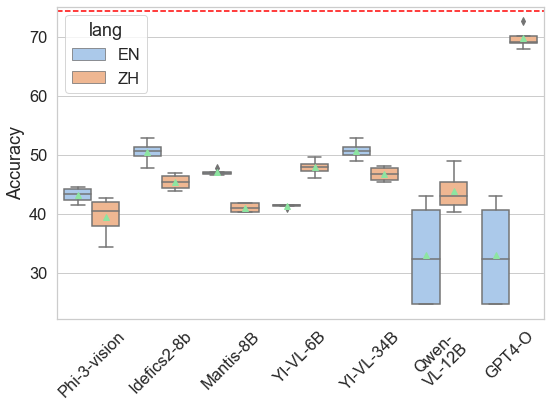

In [249]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sivqa_acc = pd.read_csv("../sivqa_acc.csv", delimiter=",")

plt.figure(figsize=(8, 6))
g = sns.boxplot(x='model', y='acc', hue='lang', data=sivqa_acc,showmeans=True)
plt.axhline(y=74.41, color='red', linestyle='--', label='Human Accuracy (ZH)')
# sns.despine(offset=10, trim=True)
# Rotate x labels
# Wrap the x-axis labels
plt.xticks(rotation=45)
# g.set_xlabel('Model')
g.set_xlabel(None)
g.set_ylabel('Accuracy')

def wrap_labels(ax, width, break_long_words=False):
    labels = ax.get_xticklabels()
    new_labels = [textwrap.fill(label.get_text(), width=width, break_long_words=break_long_words) for label in labels]
    ax.set_xticklabels(new_labels, rotation=45, ha='center')

import textwrap
ax = plt.gca()
wrap_labels(ax, 10)
plt.tight_layout()
plt.savefig("/Users/wli/projects/foodie-dataset/data/figs/sivqa_acc.pdf")


## MIVQA accuracy

In [98]:
result_dir = "/Users/wli/projects/foodie-dataset/data/results/mivqa_res"
mivqa = utils.read_mivqa("/Users/wli/projects/foodie-dataset/data/", "mivqa_filtered.json")

In [99]:
! ls /Users/wli/projects/foodie-dataset/data/results/mivqa_res

mivqa_Mantis-8B-Idefics2_en_prompt0.jsonl
mivqa_Mantis-8B-Idefics2_en_prompt1.jsonl
mivqa_Mantis-8B-Idefics2_en_prompt2.jsonl
mivqa_Mantis-8B-Idefics2_en_prompt3.jsonl
mivqa_Phi-3-vision-128k-instruct_en_prompt0.jsonl
mivqa_Phi-3-vision-128k-instruct_en_prompt1.jsonl
mivqa_Phi-3-vision-128k-instruct_en_prompt2.jsonl
mivqa_Phi-3-vision-128k-instruct_en_prompt3.jsonl
mivqa_Phi-3-vision-128k-instruct_prompt0.jsonl
mivqa_Phi-3-vision-128k-instruct_prompt1.jsonl
mivqa_Phi-3-vision-128k-instruct_prompt2.jsonl
mivqa_Phi-3-vision-128k-instruct_prompt3.jsonl
mivqa_Qwen-VL_en_prompt0.jsonl
mivqa_Qwen-VL_en_prompt1.jsonl
mivqa_Qwen-VL_en_prompt2.jsonl
mivqa_Qwen-VL_en_prompt3.jsonl
mivqa_idefics2-8b_en_prompt0.jsonl
mivqa_idefics2-8b_en_prompt1.jsonl
mivqa_idefics2-8b_en_prompt2.jsonl
mivqa_idefics2-8b_en_prompt3.jsonl
mivqa_idefics2-8b_prompt0.jsonl
mivqa_idefics2-8b_prompt1.jsonl
mivqa_idefics2-8b_prompt2.jsonl
mivqa_idefics2-8b_prompt3.jsonl
mivqa_mantis_prompt0.jsonl
mivqa_mantis_prompt1.json

In [70]:
def get_res_and_acc(mivqa, res_file_prefix, parse_fn):
    res_files = glob.glob(os.path.join(result_dir, res_file_prefix))
    print(sorted(res_files))
    
    all_data = []
    all_acc = []
    for file in sorted(res_files):
        file_name = os.path.basename(file)
        print(file_name)
        # load data
        data = read_res_data(file_name)        
        # print(data[0])
        acc = get_accuracy(mivqa, data, parse_fn)
        
        all_data.append(data)
        all_acc.append(round(acc,4))
    return all_data, all_acc

In [71]:
mantis_data, mantis_acc = get_res_and_acc(mivqa, "mivqa_mantis_prompt*.jsonl", utils.parse_mantis)
print(mantis_acc)

['/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_mantis_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_mantis_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_mantis_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_mantis_prompt3.jsonl']
mivqa_mantis_prompt0.jsonl
0.4665012406947891
mivqa_mantis_prompt1.jsonl
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, falling back to random...
Can not parse response, 

In [72]:
mantis_data, mantis_acc = get_res_and_acc(mivqa, "mivqa_qwen_*.jsonl", utils.parse_qwen)
print(mantis_acc)

['/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_qwen_temp0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_qwen_temp1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_qwen_temp2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_qwen_temp3.jsonl']
mivqa_qwen_temp0.jsonl
0.2555831265508685
mivqa_qwen_temp1.jsonl
0.27543424317617865
mivqa_qwen_temp2.jsonl
0.3052109181141439
mivqa_qwen_temp3.jsonl
0.2630272952853598
[0.2556, 0.2754, 0.3052, 0.263]


In [77]:
def parse_res(res):
    random.seed(42)
    ans_str = res["response"]
    ans_letter = re.findall(r'[A-Z]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]
phi3_data, phi3_acc = get_res_and_acc(mivqa, "mivqa_Phi-3-vision-128k-instruct_prompt*.jsonl", parse_res)
print(phi3_acc)

['/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Phi-3-vision-128k-instruct_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Phi-3-vision-128k-instruct_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Phi-3-vision-128k-instruct_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Phi-3-vision-128k-instruct_prompt3.jsonl']
mivqa_Phi-3-vision-128k-instruct_prompt0.jsonl
0.26054590570719605
mivqa_Phi-3-vision-128k-instruct_prompt1.jsonl
can not parse ans for res:  {'response': '根据以上四张图，以上需要放入囊坑烤制的是：答案为：烤制的。', 'qid': '8a5705334b2cccd1bff5792a30f2efeb_1'}
0.2903225806451613
mivqa_Phi-3-vision-128k-instruct_prompt2.jsonl
can not parse ans for res:  {'response': '菜品中，通常使用蒸制方法烹饪的是菜肴。', 'qid': '6debe03617e03b42b0ef41eec47f3e02_0'}
can not parse ans for res:  {'response': '题目：下列哪道菜是河鲜？答案为：图。\n\n题目：下列哪道菜是河鲜？答案为：图。\n\n题目：下列哪道菜是河鲜？答案为：图。\n\n题目：下列哪道菜是河鲜？答案为：图。\n\n题目：下列哪道菜是河鲜？答案为：图。\n\n题目：下列哪道

In [94]:
def parse_res(res):
    random.seed(42)
    try:
        ans_str = res["response"].split("Option")[1]
    except:
        ans_str = res["response"]
    ans_letter = re.findall(r'[A-D]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]
phi3_en_data, phi3_en_acc = get_res_and_acc(mivqa, "mivqa_Phi-3-vision-128k-instruct_en_prompt*.jsonl", parse_res)
print(phi3_en_acc)

['/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Phi-3-vision-128k-instruct_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Phi-3-vision-128k-instruct_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Phi-3-vision-128k-instruct_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Phi-3-vision-128k-instruct_en_prompt3.jsonl']
mivqa_Phi-3-vision-128k-instruct_en_prompt0.jsonl
can not parse ans for res:  {'response': '002', 'qid': '5cff42e986afc707c83ee411ae4af2e6_1'}
can not parse ans for res:  {'response': '11', 'qid': '8a5705334b2cccd1bff5792a30f2efeb_1'}
can not parse ans for res:  {'response': '2024.05.02 08:32', 'qid': 'e2cbda5cebb1ae23b462d72550b724be_0'}
can not parse ans for res:  {'response': '2024.05.02 08:32', 'qid': 'e2cbda5cebb1ae23b462d72550b724be_1'}
can not parse ans for res:  {'response': '2024.05.02 08:32', 'qid': 'e2cbda5cebb1ae23b462d72550b724be_2'}
ca

In [95]:
idefics_en_data, idefics_en_acc = get_res_and_acc(mivqa, "mivqa_idefics2-8b_en_*.jsonl", parse_res)
print(idefics_en_acc)

['/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_idefics2-8b_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_idefics2-8b_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_idefics2-8b_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_idefics2-8b_en_prompt3.jsonl']
mivqa_idefics2-8b_en_prompt0.jsonl
can not parse ans for res:  {'response': 'Liangpi.', 'qid': 'e2cbda5cebb1ae23b462d72550b724be_2'}
can not parse ans for res:  {'response': 'Liang pi.', 'qid': 'e2cbda5cebb1ae23b462d72550b724be_0'}
can not parse ans for res:  {'response': 'Shrimp.', 'qid': '6c5b20a60e51663848761ebfac4f65cc_2'}
can not parse ans for res:  {'response': 'Hot pot.', 'qid': '314e7837029070281237ea3d01a9c568_1'}
0.3870967741935484
mivqa_idefics2-8b_en_prompt1.jsonl
can not parse ans for res:  {'response': 'Liang pi.', 'qid': 'e2cbda5cebb1ae23b462d72550b724be_0'}
can not parse ans for res:  {'respo

In [97]:
mantis_en_data, mantis_en_acc = get_res_and_acc(mivqa, "mivqa_Mantis-8B-Idefics2_en_prompt*.jsonl", parse_res)
print(mantis_en_acc)

['/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Mantis-8B-Idefics2_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Mantis-8B-Idefics2_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Mantis-8B-Idefics2_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Mantis-8B-Idefics2_en_prompt3.jsonl']
mivqa_Mantis-8B-Idefics2_en_prompt0.jsonl
0.3002481389578164
mivqa_Mantis-8B-Idefics2_en_prompt1.jsonl
0.37965260545905705
mivqa_Mantis-8B-Idefics2_en_prompt2.jsonl
0.34739454094292804
mivqa_Mantis-8B-Idefics2_en_prompt3.jsonl
0.43672456575682383
[0.3002, 0.3797, 0.3474, 0.4367]


In [101]:
qwen_en_data, qwen_en_acc = get_res_and_acc(mivqa, "mivqa_Qwen-VL_en_prompt*.jsonl", parse_res)
print(qwen_en_acc)

['/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Qwen-VL_en_prompt0.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Qwen-VL_en_prompt1.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Qwen-VL_en_prompt2.jsonl', '/Users/wli/projects/foodie-dataset/data/results/mivqa_res/mivqa_Qwen-VL_en_prompt3.jsonl']
mivqa_Qwen-VL_en_prompt0.jsonl
0.27543424317617865
mivqa_Qwen-VL_en_prompt1.jsonl
0.2704714640198511
mivqa_Qwen-VL_en_prompt2.jsonl
0.2506203473945409
mivqa_Qwen-VL_en_prompt3.jsonl
can not parse ans for res:  {'response': 'Option (E)\nPicture 5: the dish is a combination of rice, meat, vegetables, and eggs.', 'qid': '5cff42e986afc707c83ee411ae4af2e6_0'}
can not parse ans for res:  {'response': 'Option (E)\nPicture 5: the food is on the table', 'qid': '5cff42e986afc707c83ee411ae4af2e6_1'}
can not parse ans for res:  {'response': 'Option (E)\nPicture 5: that is a picture of a plate of food', 'qid': '5cff42e986afc707c83ee411a

### bar plot for mivqa

In [326]:
import pandas
mivqa_acc = pandas.read_csv("../mivqa_acc.csv", delimiter=",")

In [327]:
mivqa_acc.head()

,model,acc,lang,prompt
0,Phi-3-vision,27.54,EN,0
1,Phi-3-vision,30.02,EN,1
2,Phi-3-vision,31.02,EN,2
3,Phi-3-vision,33.75,EN,3
4,Phi-3-vision,26.05,ZH,0


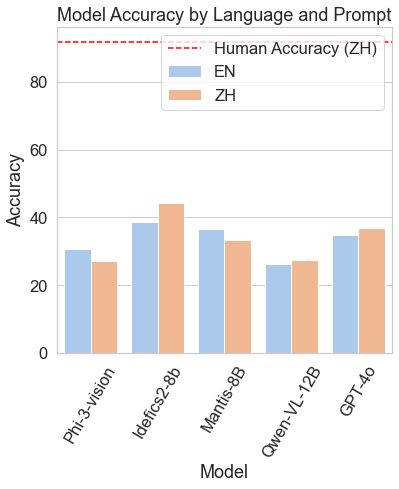

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette="pastel", style="whitegrid", font_scale=1.5)

# Create the bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='model', y='acc', hue='lang', data=mivqa_acc, ci=None)

plt.axhline(y=91.69, color='red', linestyle='--', label='Human Accuracy (ZH)')

# Titles and labels
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Language and Prompt')

# Rotate x labels
plt.xticks(rotation=60)

# Display legend
plt.legend()


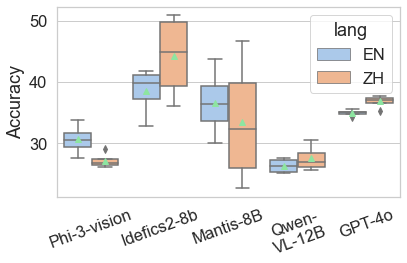

In [330]:
# mivqa_acc[mivqa_acc["model"] == "Phi-3-vision-128k-instruct"]["model"] = "Phi-3-vision"
g = sns.boxplot(x='model', y='acc', hue='lang', data=mivqa_acc,showmeans=True)
# plt.axhline(y=91.69, color='red', linestyle='--', label='Human Accuracy (ZH)')
# sns.despine(offset=10, trim=True)
# Rotate x labels
# Wrap the x-axis labels
plt.xticks(rotation=45)
# g.set_xlabel('Model')
g.set_xlabel(None)
g.set_ylabel('Accuracy')

def wrap_labels(ax, width, break_long_words=False):
    labels = ax.get_xticklabels()
    new_labels = [textwrap.fill(label.get_text(), width=width, break_long_words=break_long_words) for label in labels]
    ax.set_xticklabels(new_labels, rotation=20, ha='center')

import textwrap
ax = plt.gca()
wrap_labels(ax, 10)
plt.tight_layout()
plt.savefig("/Users/wli/projects/foodie-dataset/data/figs/mivqa_acc.pdf")


## TextQA

In [251]:
import textqa_utils
from glob import glob
import random

In [263]:
result_dir = "/Users/wli/projects/foodie-dataset/data/results/textqa_res"
textqa = textqa_utils.read_textqa("/Users/wli/projects/foodie-dataset/data/")

ans2idx = {
        "A":"0",
        "B":"1",
        "C":"2",
        "D":"3"
        }

def read_res_data(res_file):
    data = []
    # "sivqa_mantis_prompt3.jsonl"
    with open(os.path.join(result_dir, res_file), "r", encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data

def get_accuracy(sivqa, data, parse_fn=parse_res): 
    # get acc
    gts = [s["answer"] for s in sivqa]
    answers = [parse_fn(d) for d in data]
    accuracy = accuracy_score(gts, answers)
    print(accuracy)
    return accuracy


In [264]:
llama3_res_files = glob(os.path.join(result_dir, "textqa_Llama3-8B*.jsonl"))

In [265]:
llama3_res_files

['/Users/wli/projects/foodie-dataset/data/results/textqa_res/textqa_Llama3-8B-Chinese-Chat_prompt1.jsonl',
 '/Users/wli/projects/foodie-dataset/data/results/textqa_res/textqa_Llama3-8B-Chinese-Chat_prompt3.jsonl',
 '/Users/wli/projects/foodie-dataset/data/results/textqa_res/textqa_Llama3-8B-Chinese-Chat_prompt2.jsonl',
 '/Users/wli/projects/foodie-dataset/data/results/textqa_res/textqa_Llama3-8B-Chinese-Chat_prompt0.jsonl']

In [266]:

def parse_res(res):
    ans_str = res["response"]
    ans_letter = re.findall(r'[A-Z]', ans_str)
    random.seed(42)
    if not ans_letter or len(ans_letter) == 0:
        # print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            # print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]
        

In [267]:
for file in sorted(llama3_res_files):
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    # print(data[0])
    get_accuracy(textqa, data, parse_fn=parse_res)

textqa_Llama3-8B-Chinese-Chat_prompt0.jsonl
0.46099290780141844
textqa_Llama3-8B-Chinese-Chat_prompt1.jsonl
0.47375886524822697
textqa_Llama3-8B-Chinese-Chat_prompt2.jsonl
0.4595744680851064
textqa_Llama3-8B-Chinese-Chat_prompt3.jsonl
0.4652482269503546


### eval mistral

In [268]:
mistral_res_files = glob(os.path.join(result_dir, "textqa_Mistral-7B-Instruct*.jsonl"))

In [269]:
data = read_res_data(mistral_res_files[2])
print(parse_res(data[2]))

0


In [322]:
def get_accuracy(sivqa, data, parse_fn=parse_res, template=0): 
    # get acc
    gts = [s["answer"] for s in sivqa]
    answers = [parse_fn(d, template=template) for d in data]
    accuracy = round(accuracy_score(gts, answers),4)
    print(accuracy)
    return accuracy

def parse_res(res, template=0):
    random.seed(42)
    ans_str = res["response"]
    if template in [0,1]:
        try:
            ans_str = ans_str.split("选择一个正确答案")[1]
        except:
            ans_str = ans_str
    else:
        try: ans_str = ans_str.split("我选择")[1]
        except:
            ans_str = ans_str
    ans_letter = re.findall(r'[A-D]', ans_str)
    if not ans_letter or len(ans_letter) == 0:
        # print("can not parse ans for res: ", res)
        return random.choice(["0", "1", "2", "3"])
    else:
        ans = ans_letter[0].upper()
        if ans not in ans2idx:
            # print("can not parse ans for res: ", res)
            return random.choice(["0", "1", "2", "3"])
        else:
            return ans2idx[ans]
        

In [323]:
for idx, file in enumerate(sorted(mistral_res_files)):
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    # print(data[0])
    get_accuracy(textqa, data, parse_fn=parse_res, template=idx)

textqa_Mistral-7B-Instruct-v0.3_prompt0.jsonl
0.3404
textqa_Mistral-7B-Instruct-v0.3_prompt1.jsonl
0.3489
textqa_Mistral-7B-Instruct-v0.3_prompt2.jsonl
0.2539
textqa_Mistral-7B-Instruct-v0.3_prompt3.jsonl
0.2567


In [324]:
data = read_res_data(sorted(mistral_res_files)[2])        
# print(data[0])
get_accuracy(textqa, data, parse_fn=parse_res, template=idx)

0.2539


0.2539

phi-3

In [325]:
phi_res_files = glob(os.path.join(result_dir, "textqa_Phi-3*.jsonl"))

In [314]:
for idx, file in enumerate(sorted(phi_res_files)):
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)        
    # print(data[0])
    get_accuracy(textqa, data, parse_fn=parse_res, template=idx)

textqa_Phi-3-medium-4k-instruct_prompt0.jsonl
0.3929
textqa_Phi-3-medium-4k-instruct_prompt1.jsonl
0.4128
textqa_Phi-3-medium-4k-instruct_prompt2.jsonl
0.2539
textqa_Phi-3-medium-4k-instruct_prompt3.jsonl
0.2553


In [318]:
# yi_res_files = glob(os.path.join(result_dir, "textqa_Yi-34B_prompt*.jsonl"))
yi_res_files = glob(os.path.join(result_dir, "textqa_Yi-6B_prompt*.jsonl"))

In [319]:

all_data = []
all_acc = []
for idx, file in enumerate(sorted(yi_res_files)):
    file_name = os.path.basename(file)
    print(file_name)
    # load data
    data = read_res_data(file_name)
    all_data.append(data)        
    # print(data[0])
    acc = get_accuracy(textqa, data, parse_fn=parse_res, template=idx)
    all_acc.append(acc)
print(all_acc)

textqa_Yi-6B_prompt0.jsonl
0.2539
textqa_Yi-6B_prompt1.jsonl
0.2539
textqa_Yi-6B_prompt2.jsonl
0.2539
textqa_Yi-6B_prompt3.jsonl
0.2553
[0.2539, 0.2539, 0.2539, 0.2553]


In [317]:
all_data[3][0]

{'response': ' ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST] ）。\n用户：[B]\n智能助手：我选择（ [/INST',
 'qid': 'textqa-101'}